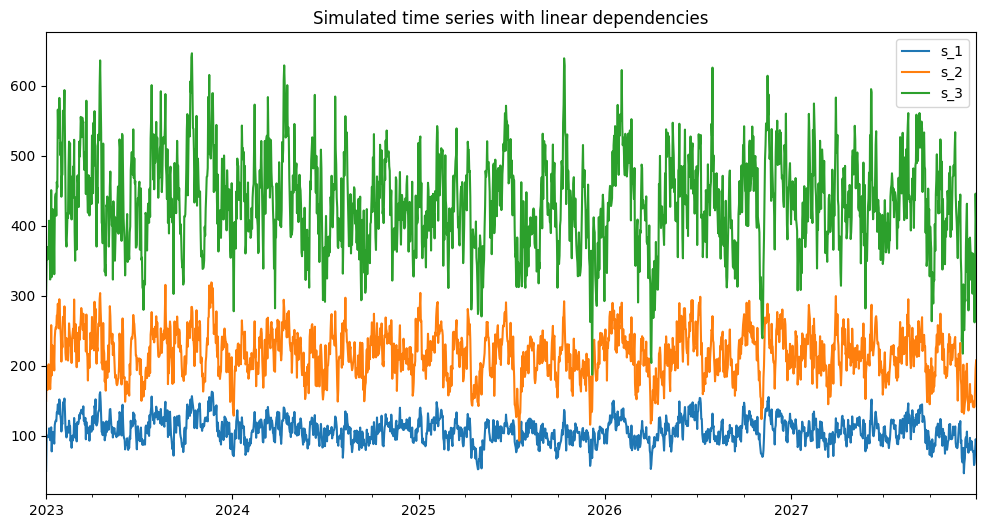

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Simulation parameters
np.random.seed(42)
n_days = 365 * 5 
brands = ['s_1', 's_2', 's_3']
a = [5, 5, 5]  # Holiday sensitivity
b = [2, 2, 2]    # Weather sensitivity
phi = [[0.6, 0.2], [0.6, 0.2], [0.6, 0.2]]  # Lag coefficients (phi_1, phi_2)
holiday = np.random.choice([0, 1], size=n_days)  # Random holiday events
weather = np.random.normal(20, 10, size=n_days)  # Random weather variable

# Initialize data storage
data = {brand: np.zeros(n_days) for brand in brands}

# initiate first two days with different values
data['s_1'][0] = 50
data['s_1'][1] = 100
data['s_2'][0] = 150
data['s_2'][1] = 200
data['s_3'][0] = 300
data['s_3'][1] = 350

scales = [0.5, 1, 2]

exogenious =  { 'holiday': holiday, 'weather': weather}

# Simulate time series with lags
for i, brand in enumerate(brands):
    for t in range(2, n_days):  # Start after lags
        
        data[brand][t] = (
            a[i] * holiday[t] * scales[i] +  # Holiday effect
            b[i] * weather[t] * scales[i] +  # Weather effect
            phi[i][0] * data[brand][t-1]  +
            phi[i][1] * data[brand][t-2] +
            np.random.normal(0, scales[i] * 10)  # Noise
        )

# Create DataFrame 
df = pd.DataFrame(data, index=pd.date_range("2023-01-01", periods=n_days))
# df['holiday'] = 
df.plot(figsize=(12, 6), title="Simulated time series with linear dependencies")
plt.show()
df_complete = df.copy()
df_complete['holiday'] = holiday
df_complete['weather'] = weather

df_complete.to_csv('data/linear_dep_time_series.csv', index=True, header=True, index_label="date")

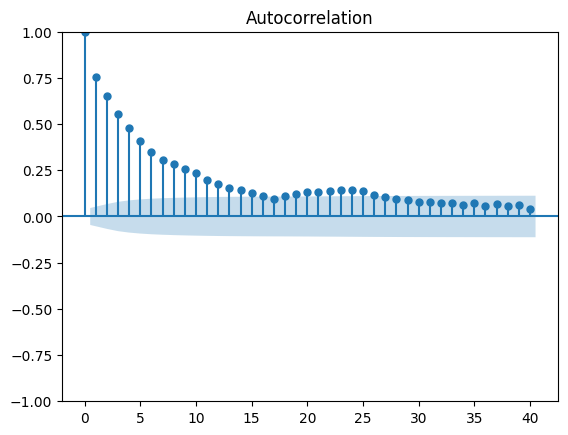

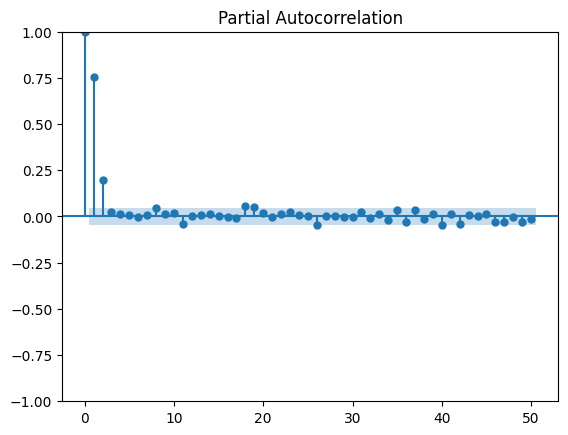

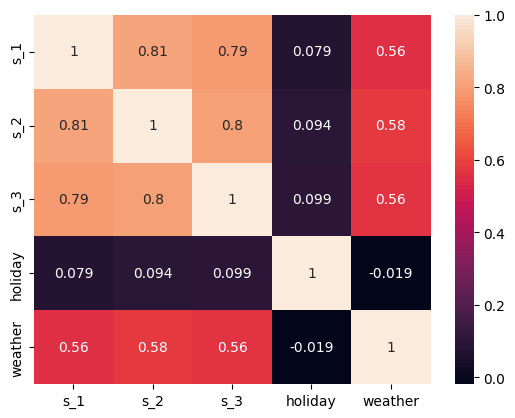

In [5]:
from pandas import read_csv
from matplotlib import pyplot
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
 
plot_acf(df_complete["s_1"], lags=40)
plot_pacf(df_complete["s_1"], lags=50)
pyplot.show()


# correlation plot
import seaborn as sns
corr = df_complete.corr()
sns.heatmap(corr, annot=True)
plt.show()


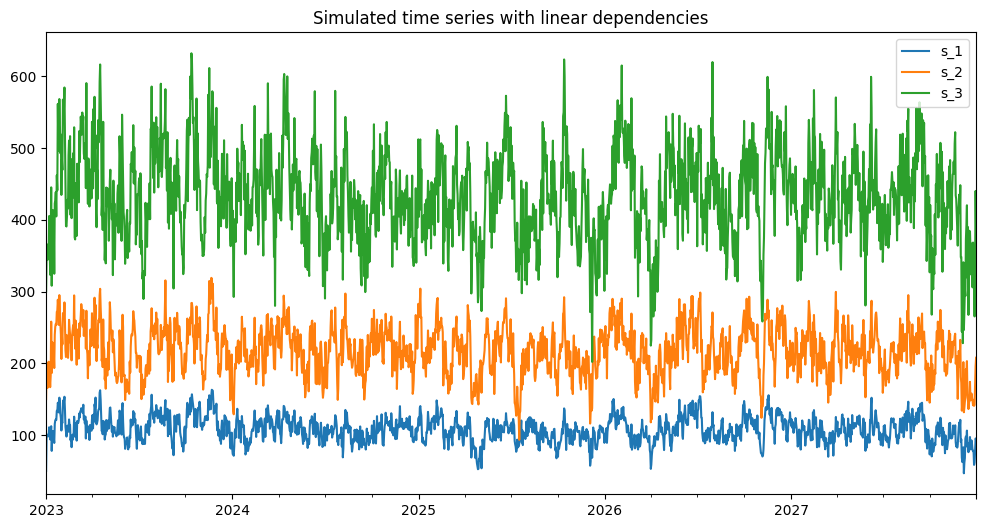

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Simulation parameters
np.random.seed(42)
n_days = 365 * 5 
brands = ['s_1', 's_2', 's_3']
a = [5, 5, 5]  # Holiday sensitivity
b = [2, 2, 2]    # Weather sensitivity
phi = [[0.6, 0.2], [0.6, 0.2], [0.4, 0.4]]  # Lag coefficients (phi_1, phi_2)
holiday = np.random.choice([0, 1], size=n_days)  # Random holiday events
weather = np.random.normal(20, 10, size=n_days)  # Random weather variable

# Initialize data storage
data = {brand: np.zeros(n_days) for brand in brands}

# initiate first two days with different values
data['s_1'][0] = 50
data['s_1'][1] = 100
data['s_2'][0] = 150
data['s_2'][1] = 200
data['s_3'][0] = 300
data['s_3'][1] = 350

scales = [0.5, 1, 2]

exogenious =  { 'holiday': holiday, 'weather': weather}

# Simulate time series with lags
for i, brand in enumerate(brands):
    for t in range(2, n_days):  # Start after lags
        
        data[brand][t] = (
            a[i] * holiday[t] * scales[i] +  # Holiday effect
            b[i] * weather[t] * scales[i] +  # Weather effect
            phi[i][0] * data[brand][t-1]  +
            phi[i][1] * data[brand][t-2] +
            np.random.normal(0, scales[i] * 10)  # Noise
        )

# Create DataFrame 
df = pd.DataFrame(data, index=pd.date_range("2023-01-01", periods=n_days))
# df['holiday'] = 
df.plot(figsize=(12, 6), title="Simulated time series with linear dependencies")
plt.show()
df_complete = df.copy()
df_complete['holiday'] = holiday
df_complete['weather'] = weather

df_complete.to_csv('data/linear_dep_different_factors.csv', index=True, header=True, index_label="date")

## sim



In [58]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
